# Importing necessary libraries

In [1]:
# Working directory
import os

# Processing data
import pandas as pd
import numpy as np
import datetime

# Linear regression model
import statsmodels.api as sm

# t test
from scipy.stats import t

# Plotting
import matplotlib.pyplot as plt

# 1. Event definition

#### We are conducting an analysis to assess the impact of the announcement of DeepSeek on stock market returns. The event of interest is the public revelation of DeepSeek, which is hypothesized to affect the stock price of NVIDIA Corporation. We choose an 11-day event window, comprising 5 trading days before the event day, the event day, and 5 trading days after the event day.


In [2]:
# Defining the event window 
event_date = '2025-1-27'
event_start = -5
event_end = 5

# 2. Selection criteria

#### Our study specifically focuses on NVIDIA Corporation, a company of particular interest due to its leading position in the technology sector and potential involvement with DeepSeek. This event is expected to have a significant impact on the company’s stock performance.

In [3]:
# Defining the stock
security_ticker = 'NVDA'

# 3. Normal and abnormal returns

#### We use the market model to estimate normal returns, using the S&P 500 index as the market portfolio.

In [4]:
# Defining the market portfolio
market_ticker = 'SPX'

# 4. Estimation procedure

#### We choose a 120-trading-days estimation window ending 10 days prior to the event window.

In [5]:
# Defining the estimation window
estimation_end = event_start - 10 - 1 
estimation_start = estimation_end - (120 - 1)

### Importing data

In [6]:
# Setting the working directory
os.chdir(r"C:\Users\charl\OneDrive\Desktop")

In [7]:
# Importing historical data: securities
data_securities = pd.read_excel("K线导出_NVDA_日线数据.xlsx")
data_securities.head()

,证券代码,证券名称,交易时间,开盘价,最高价,最低价,收盘价,涨跌,涨跌幅%,成交量,成交额
0,NVDA,英伟达,2024-01-02,25765.717,25792.395,24902.918,25202.730,-708.4392,-2.7341,41125422.0,1.975985e+10
1,NVDA,英伟达,2024-01-03,24845.358,25211.154,24759.026,24889.304,-313.4256,-1.2436,32089617.0,1.529855e+10
2,NVDA,英伟达,2024-01-04,24992.914,25376.434,24857.397,25113.778,224.4744,0.9019,30653489.0,1.474284e+10
3,NVDA,英伟达,2024-01-05,25356.551,25924.249,25274.929,25688.798,575.0192,2.2897,41503927.0,2.035165e+10
4,NVDA,英伟达,2024-01-08,25905.926,27351.609,25888.674,27340.106,1651.3080,6.4281,64250990.0,3.298366e+10


In [8]:
data_securities.rename(columns={'交易时间': 'trading_date', '证券代码': 'security_ticker', '收盘价': 'price'}, 
                       inplace=True)
data_securities = data_securities[['trading_date', 'security_ticker', 'price']]
data_securities = data_securities[data_securities['security_ticker']==security_ticker]
data_securities.head()

,trading_date,security_ticker,price
0,2024-01-02,NVDA,25202.730
1,2024-01-03,NVDA,24889.304
2,2024-01-04,NVDA,25113.778
3,2024-01-05,NVDA,25688.798
4,2024-01-08,NVDA,27340.106


In [9]:
## Calculating daily returns 
data_securities['return'] =  data_securities['price'].pct_change()
data_securities = data_securities[['trading_date', 'return']]
data_securities.head()

,trading_date,return
0,2024-01-02,NaN
1,2024-01-03,-0.012436
2,2024-01-04,0.009019
3,2024-01-05,0.022897
4,2024-01-08,0.064281


In [10]:
# Importing historical data: market portfolio
data_market = pd.read_excel("K线导出_SPX_日线数据.xlsx")
data_market.head()

,证券代码,证券名称,交易时间,开盘价,最高价,最低价,收盘价,涨跌,涨跌幅%,成交量,成交额
0,SPX,标普500,2024-01-02,4745.20,4754.33,4722.67,4742.83,-27.0000,-0.5661,0.0,0.0
1,SPX,标普500,2024-01-03,4725.07,4729.29,4699.71,4704.81,-38.0200,-0.8016,0.0,0.0
2,SPX,标普500,2024-01-04,4697.42,4726.78,4687.53,4688.68,-16.1299,-0.3428,0.0,0.0
3,SPX,标普500,2024-01-05,4690.57,4721.49,4682.11,4697.24,8.5601,0.1826,0.0,0.0
4,SPX,标普500,2024-01-08,4703.70,4764.54,4699.82,4763.54,66.2998,1.4115,0.0,0.0


In [11]:
data_market.rename(columns={'证券代码': 'market_ticker', '交易时间': 'trading_date', '收盘价': 'price'}, 
                   inplace=True)
data_market = data_market[['trading_date', 'market_ticker', 'price']]
data_market = data_market[data_market['market_ticker']==market_ticker]
data_market.head()

,trading_date,market_ticker,price
0,2024-01-02,SPX,4742.83
1,2024-01-03,SPX,4704.81
2,2024-01-04,SPX,4688.68
3,2024-01-05,SPX,4697.24
4,2024-01-08,SPX,4763.54


In [12]:
## Calculating daily returns 
data_market['market_return'] =  data_market['price'].pct_change()
data_market = data_market[['trading_date', 'market_return']]
data_market.head()

,trading_date,market_return
0,2024-01-02,NaN
1,2024-01-03,-0.008016
2,2024-01-04,-0.003428
3,2024-01-05,0.001826
4,2024-01-08,0.014115


In [13]:
# Merging data sets
data_all = pd.merge(data_securities, data_market, on='trading_date', how='left')
data_all.head()

,trading_date,return,market_return
0,2024-01-02,NaN,NaN
1,2024-01-03,-0.012436,-0.008016
2,2024-01-04,0.009019,-0.003428
3,2024-01-05,0.022897,0.001826
4,2024-01-08,0.064281,0.014115


In [14]:
index_event_day = data_all.index[data_all['trading_date']==event_date].tolist()
if index_event_day:
    data_all['event_time'] = 0
    for i in range(len(data_all)):
        data_all.loc[data_all.index[i], 'event_time'] = i - index_event_day[0]
else:
    print("No trading date matches the event date.")
data_all[(data_all['event_time']>=event_start) & (data_all['event_time']<=event_end)]

,trading_date,return,market_return,event_time
262,2025-01-17,0.030995,0.009991,-5
263,2025-01-21,0.022656,0.008768,-4
264,2025-01-22,0.044309,0.006138,-3
265,2025-01-23,0.001020,0.005314,-2
266,2025-01-24,-0.031246,-0.002855,-1
267,2025-01-27,-0.169682,-0.014581,0
268,2025-01-28,0.089259,0.009219,1
269,2025-01-29,-0.041011,-0.004681,2
270,2025-01-30,0.007680,0.005277,3
271,2025-01-31,-0.036742,-0.005048,4


### Estimating the market model

In [15]:
data_all_estimation = data_all[(data_all['event_time']>=estimation_start) & (data_all['event_time']<=estimation_end)]
data_all_estimation.tail()

,trading_date,return,market_return,event_time
247,2024-12-24,0.003939,0.011043,-20
248,2024-12-26,-0.002068,-0.000406,-19
249,2024-12-27,-0.020868,-0.011056,-18
250,2024-12-30,0.003504,-0.010702,-17
251,2024-12-31,-0.023275,-0.004285,-16


In [16]:
X_estimation = data_all_estimation['market_return']
X_estimation = sm.add_constant(X_estimation)
R_estimation = data_all_estimation['return']
market_model = sm.OLS(R_estimation, X_estimation).fit()
print(market_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     122.2
Date:                Fri, 07 Feb 2025   Prob (F-statistic):           6.25e-20
Time:                        19:47:13   Log-Likelihood:                 281.80
No. Observations:                 120   AIC:                            -559.6
Df Residuals:                     118   BIC:                            -554.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0002      0.002     -0.110

# 5. Testing procedure

### Calculating abnormal returns

In [17]:
data_all_event = data_all[(data_all['event_time']>=event_start) & (data_all['event_time']<=event_end)]
data_all_event = data_all_event.reset_index()
data_all_event

,index,trading_date,return,market_return,event_time
0,262,2025-01-17,0.030995,0.009991,-5
1,263,2025-01-21,0.022656,0.008768,-4
2,264,2025-01-22,0.044309,0.006138,-3
3,265,2025-01-23,0.001020,0.005314,-2
4,266,2025-01-24,-0.031246,-0.002855,-1
5,267,2025-01-27,-0.169682,-0.014581,0
6,268,2025-01-28,0.089259,0.009219,1
7,269,2025-01-29,-0.041011,-0.004681,2
8,270,2025-01-30,0.007680,0.005277,3
9,271,2025-01-31,-0.036742,-0.005048,4


In [18]:
## Calculating normal returns 
X_event = data_all_event['market_return']
X_event = sm.add_constant(X_event)
data_all_event['normal_return'] = market_model.predict(X_event)

In [19]:
# Calculateing abnormal returns as the difference between actual returns and normal returns
data_all_event['abnormal_return'] = data_all_event['return'] - data_all_event['normal_return']

### Calculating cumulative abnormal returns

In [20]:
# Aggregating the abnormal returns over the event window to get the cumulative abnormal returns
data_all_event['cumulative_abnormal_return'] = data_all_event['abnormal_return'].cumsum()

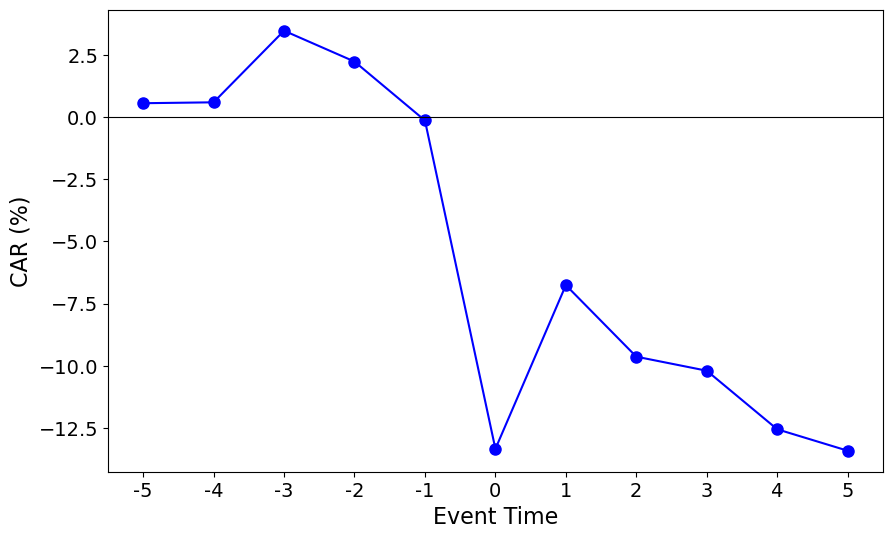

In [21]:
# Plotting the cumulative abnormal returns
plt.figure(figsize=(10, 6)) 
plt.plot(data_all_event['event_time'], 100*data_all_event['cumulative_abnormal_return'], 
         marker='o', linestyle='-', color='b', markersize=8) 
plt.axhline(0, color='black', linewidth=0.8)

## Customizing the plot
plt.xlabel('Event Time', fontsize=16)
plt.ylabel('CAR (%)', fontsize=16)
ticks = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
plt.xticks(ticks, ticks)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

## Showing the plot
plt.show()

### Significane of ARs and CARs

In [22]:
# Calculating the sample standard errors of ARs
## Equations (4.4) and (4.5)
L1 = data_all_estimation.shape[0]
e_hat_estimation = market_model.resid
sigma2_hat = np.sum(np.square(e_hat_estimation)) / (L1 - 2)
np.sqrt(sigma2_hat)

0.023309563821451863

In [23]:
## Equation (5.3)
L2 = data_all_event.shape[0]
V_hat = sigma2_hat*np.eye(L2) + sigma2_hat*X_event@np.linalg.inv(X_estimation.T@X_estimation)@X_event.T.values
V_hat

,0,1,2,3,4,5,6,7,8,9,10
0,5.527568e-04,8.792304e-06,7.439936e-06,7.016039e-06,0.000003,-3.212714e-06,9.024318e-06,0.000002,6.997313e-06,0.000002,3.720204e-07
1,8.792304e-06,5.515801e-04,7.065768e-06,6.696335e-06,0.000003,-2.218167e-06,8.446578e-06,0.000002,6.680016e-06,0.000002,9.059791e-07
2,7.439936e-06,7.065768e-06,5.495967e-04,6.008645e-06,0.000004,-7.887504e-08,7.203848e-06,0.000003,5.997501e-06,0.000003,2.054537e-06
3,7.016039e-06,6.696335e-06,6.008645e-06,5.491289e-04,0.000004,5.916831e-07,6.814316e-06,0.000003,5.783567e-06,0.000003,2.414550e-06
4,2.816036e-06,3.035973e-06,3.509063e-06,3.657353e-06,0.000548,7.235612e-06,2.954809e-06,0.000005,3.663903e-06,0.000006,5.981587e-06
5,-3.212714e-06,-2.218167e-06,-7.887504e-08,5.916831e-07,0.000007,5.601082e-04,-2.585187e-06,0.000009,6.213043e-07,0.000009,1.110177e-05
6,9.024318e-06,8.446578e-06,7.203848e-06,6.814316e-06,0.000003,-2.585187e-06,5.519955e-04,0.000002,6.797109e-06,0.000002,7.089310e-07
7,1.877523e-06,2.218046e-06,2.950519e-06,3.180111e-06,0.000005,8.720233e-06,2.092382e-06,0.000549,3.190253e-06,0.000006,6.778660e-06
8,6.997313e-06,6.680016e-06,5.997501e-06,5.783567e-06,0.000004,6.213043e-07,6.797109e-06,0.000003,5.491099e-04,0.000003,2.430454e-06
9,1.688350e-06,2.053179e-06,2.837934e-06,3.083915e-06,0.000006,9.019484e-06,1.918545e-06,0.000006,3.094781e-06,0.000550,6.939324e-06


In [24]:
## Sample standard errors of ARs
data_all_event['s.e._abnormal_return'] = np.sqrt(np.diag(V_hat))

In [25]:
# Calculating the sample standard errors of CARs
data_all_event['s.e._cumulative_abnormal_return'] = np.sqrt(np.cumsum(np.diag(V_hat)))

In [26]:
# t statistics and p values: Testing the significance of CARs
data_all_event['t_cumulative_abnormal_return'] = data_all_event['cumulative_abnormal_return'] / data_all_event['s.e._cumulative_abnormal_return']
data_all_event['p_cumulative_abnormal_return'] = 2*t.sf(np.abs(data_all_event['t_cumulative_abnormal_return']), L1 - 2)

In [27]:
# Confidence intervals: CARs
data_all_event['upper_cumulative_abnormal_return'] = data_all_event['cumulative_abnormal_return'] + t.ppf(1 - 0.1/2, L1 - 2)*data_all_event['s.e._cumulative_abnormal_return']
data_all_event['lower_cumulative_abnormal_return'] = data_all_event['cumulative_abnormal_return'] - t.ppf(1 - 0.1/2, L1 - 2)*data_all_event['s.e._cumulative_abnormal_return']

In [28]:
data_all_event.rename(columns={'abnormal_return': 'AR',
                               'cumulative_abnormal_return': 'CAR',
                               's.e._abnormal_return': 's.e._AR',
                               's.e._cumulative_abnormal_return': 's.e._CAR',
                               't_cumulative_abnormal_return': 't_CAR',
                               'p_cumulative_abnormal_return': 'p_CAR',
                               'upper_cumulative_abnormal_return': 'upper_CAR',
                               'lower_cumulative_abnormal_return': 'lower_CAR'}, inplace=True)
data_all_event[['event_time', 'AR', 's.e._AR', 'CAR', 's.e._CAR', 't_CAR', 'p_CAR', 'upper_CAR', 'lower_CAR']]

,event_time,AR,s.e._AR,CAR,s.e._CAR,t_CAR,p_CAR,upper_CAR,lower_CAR
0,-5,0.005559,0.023511,0.005559,0.023511,0.236457,0.813488,0.044537,-0.033419
1,-4,0.000362,0.023486,0.005921,0.033232,0.178182,0.858886,0.061015,-0.049172
2,-3,0.028773,0.023443,0.034694,0.040669,0.853099,0.395333,0.102118,-0.032729
3,-2,-0.012398,0.023433,0.022297,0.046937,0.475034,0.635641,0.100112,-0.055518
4,-1,-0.023675,0.023419,-0.001378,0.052455,-0.026273,0.979084,0.085585,-0.088342
5,0,-0.131983,0.023667,-0.133361,0.057547,-2.317437,0.022204,-0.037956,-0.228766
6,1,0.065805,0.023495,-0.067556,0.062158,-1.086840,0.279323,0.035494,-0.170606
7,2,-0.028749,0.023437,-0.096305,0.066430,-1.449728,0.149787,0.013827,-0.206437
8,3,-0.005644,0.023433,-0.101949,0.070442,-1.447285,0.150469,0.014834,-0.218732
9,4,-0.023536,0.023442,-0.125485,0.074240,-1.690264,0.093617,-0.002405,-0.248565


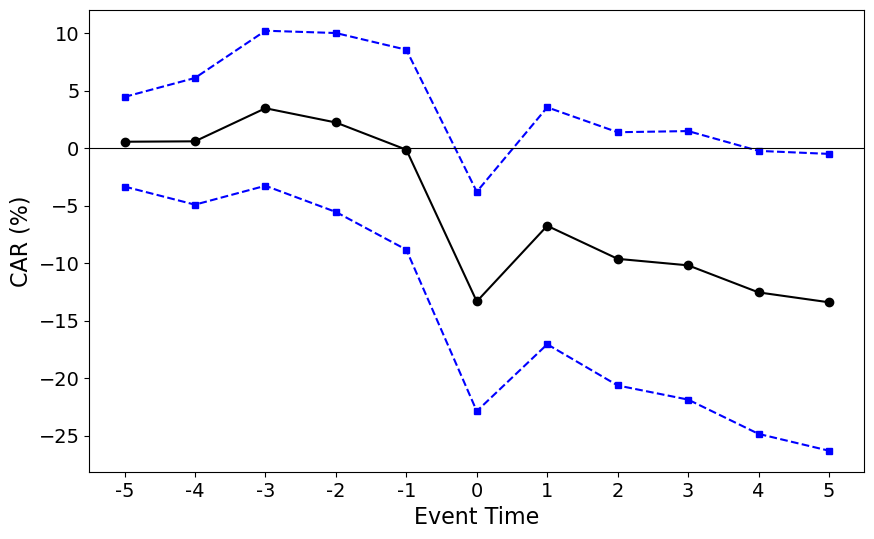

In [29]:
# Plotting the cumulative abnormal returns
plt.figure(figsize=(10, 6)) 
plt.plot(data_all_event['event_time'], 100*data_all_event['CAR'], 
         marker='o', linestyle='-', color='black', markersize=6) 
plt.plot(data_all_event['event_time'], 100*data_all_event['upper_CAR'], 
         marker='s', linestyle='--', color='blue', markersize=4) 
plt.plot(data_all_event['event_time'], 100*data_all_event['lower_CAR'], 
         marker='s', linestyle='--', color='blue', markersize=4) 
plt.axhline(0, color='black', linewidth=0.8)

## Customizing the plot
plt.xlabel('Event Time', fontsize=16)
plt.ylabel('CAR (%)', fontsize=16)
ticks = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
plt.xticks(ticks, ticks)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

## Showing the plot
plt.show()

### Replicating the results provided by the 'eventstudy' library

In [30]:
# Sample standard errors of ARs
np.sqrt(np.var(e_hat_estimation))

0.023114501280665747

In [34]:
# Sample standard errors of CARs
np.sqrt(np.var(e_hat_estimation)*np.arange(1,12))

array([0.0231145 , 0.03268884, 0.04003549, 0.046229  , 0.0516856 ,
       0.05661873, 0.06115522, 0.06537768, 0.0693435 , 0.07309447,
       0.07666213])

In [36]:
# t statistics
t_statistic = np.array(data_all_event[['CAR']].T) / np.array(np.sqrt(np.var(e_hat_estimation)*np.arange(1,12))).T
t_statistic

array([[ 0.24051071,  0.18113987,  0.86658914,  0.48230727, -0.02666446,
        -2.35542243, -1.10466274, -1.47305954, -1.47020602, -1.71674953,
        -1.74924952]])

In [37]:
# p values
2*t.sf(np.abs(t_statistic), data_all_estimation.shape[0] - 2)

array([[0.81035172, 0.85656855, 0.38792586, 0.63048114, 0.9787724 ,
        0.02015173, 0.27155316, 0.14339748, 0.14416739, 0.08864874,
        0.08284793]])